<a href="https://colab.research.google.com/github/maanjadhav/basic_git/blob/main/Fraud_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
kartik2112_fraud_detection_path = kagglehub.dataset_download('kartik2112/fraud-detection')

print('Data source import complete.')


Data source import complete.


# Description
This is my personal project for learning and practicing fraud detection techniques using real-world inspired synthetic data. The goal is to identify fraudulent transactions (Card Not Present Transaction Fraud) by engineering behavioral features and training classification models with PySpark and SparkML.

The dataset was generated using Sparkov Data Generation tool and covers transactions of 1000 customers with a pool of 800 merchants over 6 months.

Workflow:
1. Ingest and Inspect
2. Data Cleaning
3. Initial Feature Engineering
4. EDA (using Pandas)
5. Final Feature Engineering
6. Model Training
7. Model Evaluation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# 1. Ingest and Inspect dataset

In [ ]:
df = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [ ]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# 2. Data Preprocessing

## 2.1 Checking null values

In [ ]:
df.isna().sum()

,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0
city,0


There is no missing value!

## 2.2 Drop duplicate

In [ ]:
df.duplicated().sum()

np.int64(0)

Also no duplicate values!

# 3. EDA

## 3.1 Class Distribution

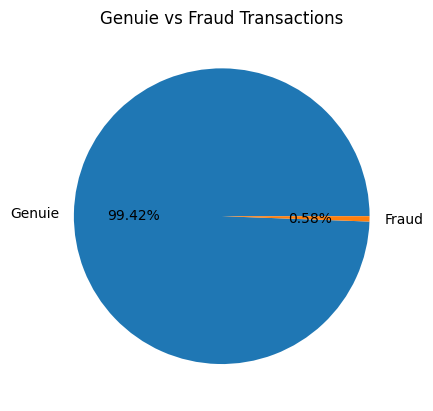

In [ ]:
plt.pie(df["is_fraud"].value_counts(), labels=["Genuie", "Fraud"], autopct='%.2f%%')

plt.title("Genuie vs Fraud Transactions")

plt.show()

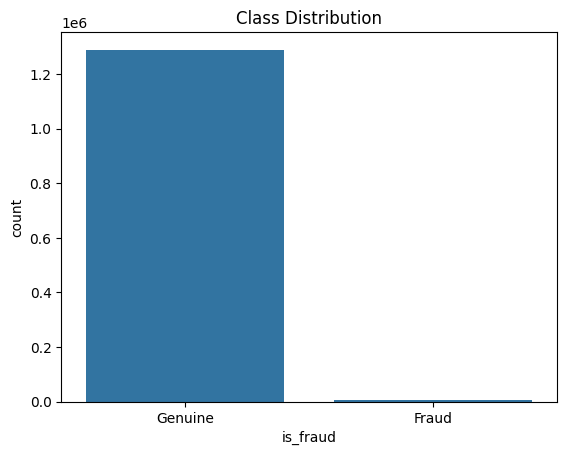

In [ ]:
sns.countplot(x='is_fraud', data=df)
plt.title("Class Distribution")
plt.xticks([0, 1], ['Genuine', 'Fraud'])
plt.show()

**Genuine**: 99.42% of the dataset\
**Fraud**: 0.58% of the dataset

The dataset is overwhelmingly imbalanced, which is expected in a credit card fraud detection scenario. In classification problems, learning from imbalanced data is challenging because most machine learning algorithms are not designed to handle large disparities between class distributions. In fact, a classifier that always predicts the majority class (non-fraud) would still achieve a deceptively high accuracy of 99.42%, despite being completely useless for detecting fraud.

As far as I know from the Fraud Detection handbook, there are several approaches to address this kind of problem:
- Cost-sensitive learning (assigns higher penalty to mistakes on the minority class, so the model is trained to take it seriously)
- Resampling (Oversampling the minority class OR Undersampling the majority class.)
- Ensemble methods

Detailed implementation will be explained later!

## 3.2 Category of Merchant vs Fraud

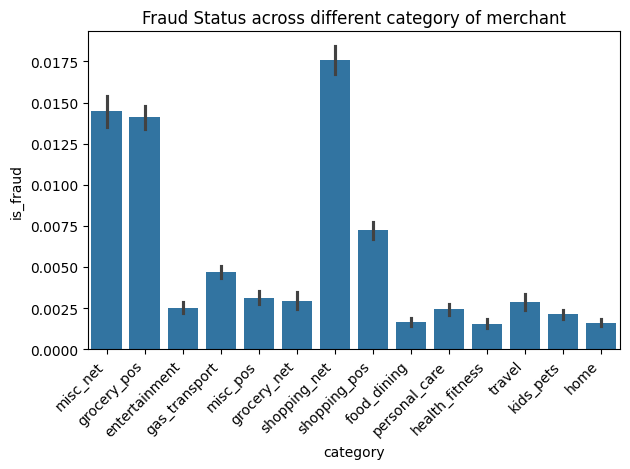

In [ ]:
sns.barplot(x='category', y='is_fraud', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Fraud Status across different category of merchant')
plt.tight_layout()
plt.show()

Based on the bar plot, there are several key insights:
- **Highest Fraud Rates**: `shopping_net` (online shopping) exhibits the highest fraud rate, reaching approximately 1.75%. Following closely are `misc_net` and `grocery_pos`, both showing substantial fraud rates around 1.4% - 1.5%.
- **Moderately High Fraud Rates**: `shopping_pos` (point-of-sale shopping) also presents a notable fraud rate of approximately 0.7%.
- **Significantly Lower Fraud Rates**: The majority of other categories generally display significantly lower fraud rates, typically below 0.5%.

$=>$ These observations suggest that `shopping_pos`, `misc_net`, and `grocery_pos` represent the primary sources of fraudulent activity. Consequently, for our fraud detection efforts, we will prioritize these categories. A new binary feature, `is_high_fraud_category`, will be engineered to flag transactions belonging to these high-risk categories.

## 3.3 Amount Distribution

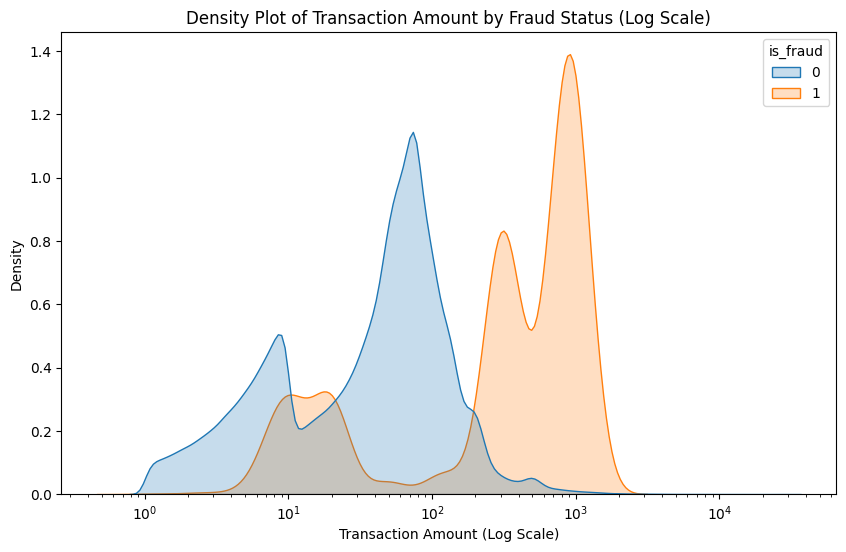

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='amt', hue='is_fraud', log_scale=True, common_norm=False, fill=True)
plt.title('Density Plot of Transaction Amount by Fraud Status (Log Scale)')
plt.xlabel('Transaction Amount (Log Scale)')
plt.ylabel('Density')
plt.show()

The distribution patterns show a clear separation between fraud and genuie transactions:
- Fraudulent transactions (orange) cluster heavily around $$1000-$2,000 range
- Non-fraudulent transactions (blue) are more evenly distributed across lower amounts

This pattern aligns with typical fraudster behavior, as they tend to maximize their gains while staying below common detection thresholds that might trigger additional security measures.

## 3.4 Correlation Matrix

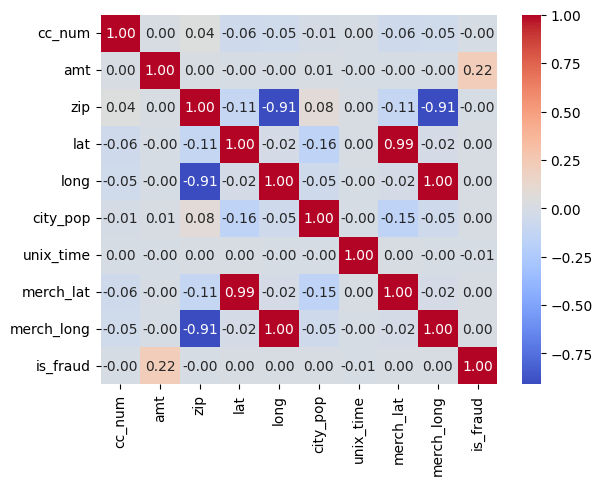

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

Key Insights from the Correlation Matrix:
- There are extremely high correlations between `lat`/`merch_lat`, `long`/`merch_long`, and `zip`. One of the highly correlated pairs can be dropped because redundant features add noise, increase training time slightly.
- `amt` is confirmed as a key feature. Its positive correlation with `is_fraud` means the model can use this feature to discriminate fraud.
- `unix_time` as a raw feature is not useful (has a very weak negative correlation of -0.01 with `is_fraud`). This is expected, as fraud doesn't necessarily become more or less likely just because more time has passed in a linear fashion. We need to engineer time-based features from unix_time (e.g., `hour_of_day`, `day_of_week`, `transaction_velocity`, `time_since_last_transaction_for_card`/`user`) which are likely to be much more predictive.
- `cc_num` and `city_pop` show almost no linear correlation with is_fraud and can be dropped (?)

In [ ]:
def compute_distance(row):
    return geodesic((row['lat'], row['long']), (row['merch_lat'], row['merch_long'])).km

df['distance_km'] = df.apply(compute_distance, axis=1)
sns.boxplot(x='is_fraud', y='distance_km', data=df)
plt.show()

# 4. Feature Engineering